In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d, RectBivariateSpline

In [2]:
def plot_graph(x, y, c, i, name):
    plt.scatter(x, y, c=c)
    plt.colorbar()
    plt.title('data{}_chi-square value'.format(i))
    plt.xlabel('$\\theta_{23}$ (degree)')
    plt.ylabel('$\delta_{cp}$ (degree)')
    plt.clim(0,)
    plt.savefig('chi2_picture/data_{} '.format(i) + name)
    plt.show()

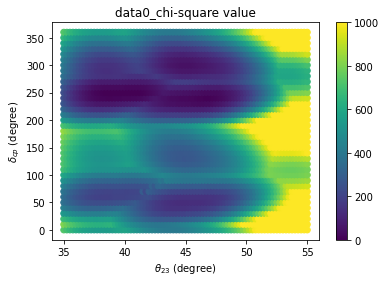

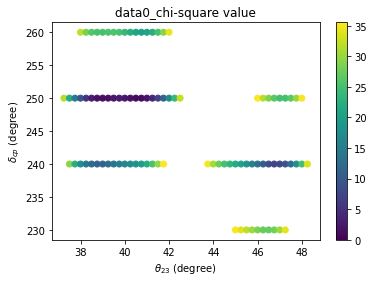

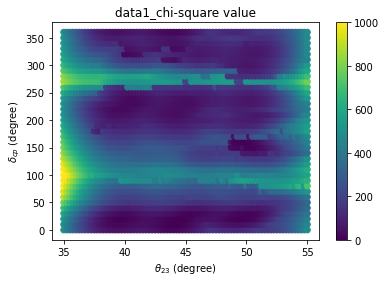

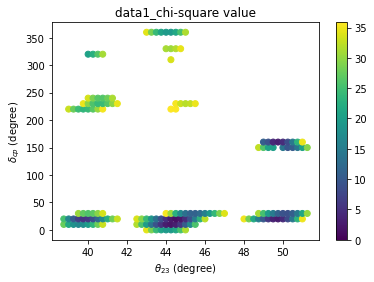

In [3]:
for i in range(2):
    a = np.loadtxt('../../Data/chi_theta23_delta_contour/chi_theta23_delta_v{}.dat'.format(i))
    loc = np.where(a[:, 2] < 5.99**2)
    plot_graph(a[:, 0], a[:, 1], a[:,2], i, 'chi-square value_full')
    plot_graph(a[loc, 0], a[loc, 1], a[loc,2], i, 'chi-square value_two_sigma')

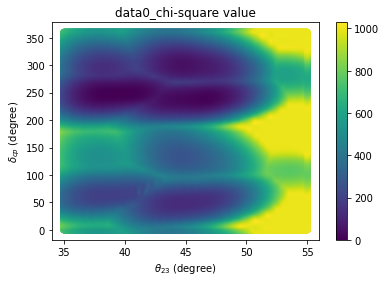

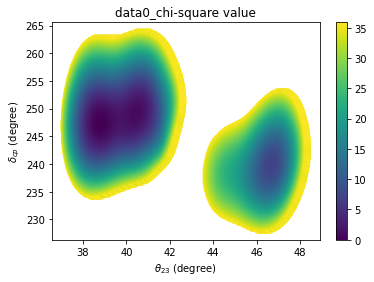

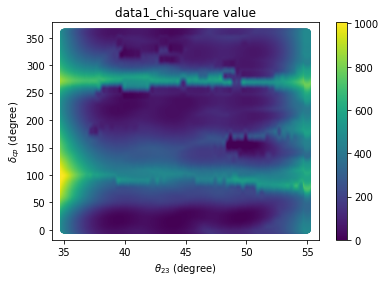

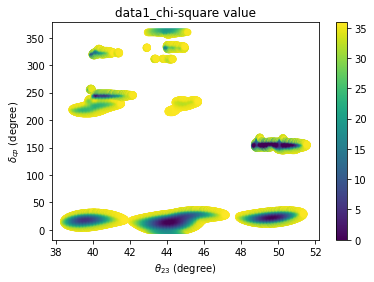

In [4]:
for i in range(2):
    a = np.loadtxt('../../Data/chi_theta23_delta_contour/chi_theta23_delta_v{}.dat'.format(i))
    arr = list(zip(*a))
    x0 = sorted(set(arr[0]))
    y0 = sorted(set(arr[1]))
    z0 = np.reshape(arr[2], (81, 37))
    f = RectBivariateSpline(x0, y0, z0)
    xnew = np.linspace(35, 55, 1000)
    ynew = np.linspace(0, 360, 1000)
    znew = f(xnew, ynew)
    mx, my = np.meshgrid(xnew, ynew)
    mx = list(zip(*mx))
    my = list(zip(*my))
    x = np.reshape(mx, 1000000)
    y = np.reshape(my, 1000000)
    z = np.reshape(znew, 1000000)
    plot_graph(x, y, z, i , 'chi-square value_full (RectBivariateSpline)')
    loc = np.where(z < 5.99**2)
    plot_graph(x[loc], y[loc], z[loc], i, 'chi-square value_two_sigma (RectBivariateSpline)')